<a href="https://colab.research.google.com/github/1rafaelmayer/music-clustering/blob/main/Music_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating music genres: An unsupervised music clustering approach
by Rafael A. Mayer, Dec 7, 2022

The article is published in my GitHub page.

**Abstract**

In this work, we employed an unsupervised learning paradigm to understand how musical genres can be grouped. We worked with dimensionality reduction methods, such as PCA, as well as clustering models like KMeans, and hierarchical clustering. Our results highlighted attributes such as musical mode, explicitness, energy, and acoustics as relevant for the clustering problem. Despite the significant variance in attributes within the same genre, we consistently found a similar grouping of genres across all clustering models. Thus, we foresee that our work could not only be a powerful tool for the quantified understanding of musical genres but also for data scientists seeking ways to preprocess their data for classification tasks.

## Dataset description
In this work, we used Spotify™ music data made available on the Kaggle™ community ([Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)). The dataset contains 114 genres, and for each genre, we have a total of 1,000 songs. The attributes for each song are:

- Track ID
- Artist
- Album name
- Popularity
- Duration (ms)
- Explicitness (whether the lyrics contain explicit words)
- Danceability
- Energy
- Key (0=C, 2=D, and so on)
- Average loudness (in dB)
- Mode (whether the scale is minor or major)
- Speechiness (presence of spoken words)
- Acousticness
- Instrumentalness (predicts whether the track contains no vocals)
- Liveness (presence of an audience)
- Valence (detects the emotional positivity of the track)
- Tempo (in beats per minute - BPM)
- Time signature
- Musical genre

For the clustering task, we removed the attributes of track ID, artist, album name, and musical genre. The genre of the songs was later added for cluster comparison. Therefore, for each sample, we have 15 attributes that will be used to train the models. All these attributes were rescaled from 0 to 1.


## Loading data and python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
from sklearn.decomposition import PCA

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# The shareable link
id= '1pipGetW28gmHyvZ_GUD_6FalD0-hQrqt'

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.csv')
df = pd.read_csv('dataset.csv')
# Dataset is now stored in a Pandas Dataframe

## Removing specific music informations

In [3]:
y = df['track_genre']
cols_to_drop = ['Unnamed: 0','track_id','artists','album_name','track_name','track_genre']
x = df.drop(cols_to_drop,axis=1)
x = x.astype('float64')
x_s = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

Let's work only with a fraction of the dataset for simplicity.

In [4]:
x_sub = x_s.sample(frac=0.3, replace=True, random_state=42,axis=0)
y_sub = y[x_sub.index]

## Data visualization in 2D
### PCA

As an initial analysis of the data, we applied the Principal Component Analysis (PCA) method. It was identified that ten components explain 96.46\% of the variance in the data, while two components account for only 45.21\% of the variance. The first component has a strong negative correlation with the musical mode, and the second component has a positive correlation with acousticness and a negative correlation with the energy of the music.

In [17]:
pca = PCA(n_components = 10)
pca.fit(x_s)
variance_cumsum = pca.explained_variance_ratio_.cumsum()

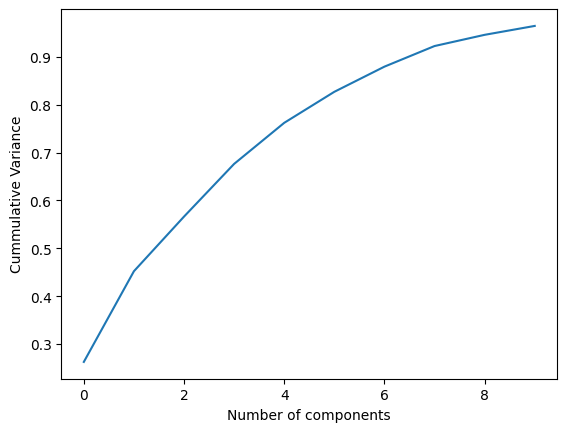

In [18]:
plt.figure()
plt.plot(variance_cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cummulative Variance')
plt.show()

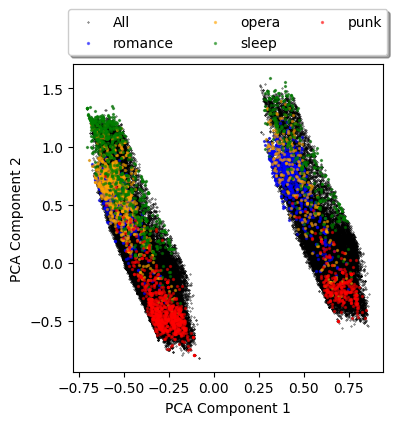

In [21]:
x_pca = pca.transform(x_s)
plt.figure(figsize=(4,4))
plt.scatter(x_pca[:,0],x_pca[:,1],color='black',s=0.1,label='All')

idx = y[y=='romance'].index
plt.scatter(x_pca[idx,0],x_pca[idx,1],color='blue',alpha=0.5,s=2,label='romance')

idx = y[y=='opera'].index
plt.scatter(x_pca[idx,0],x_pca[idx,1],color='orange',alpha=0.5,s=2,label='opera')

idx = y[y=='sleep'].index
plt.scatter(x_pca[idx,0],x_pca[idx,1],color='green',alpha=0.5,s=2,label='sleep')

idx = y[y=='punk'].index
plt.scatter(x_pca[idx,0],x_pca[idx,1],color='red',alpha=0.5,s=2,label='punk')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)
plt.show()

It is notable that the first component effectively separates the genres romance (blue) from opera (orange), as the former predominantly features a minor mode, while the latter features a major mode. The second component clearly separates the genres sleep (green) and punk, as their energy and acousticness are quite different.

Let's see how this would look like in 3D? (using three principal components)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


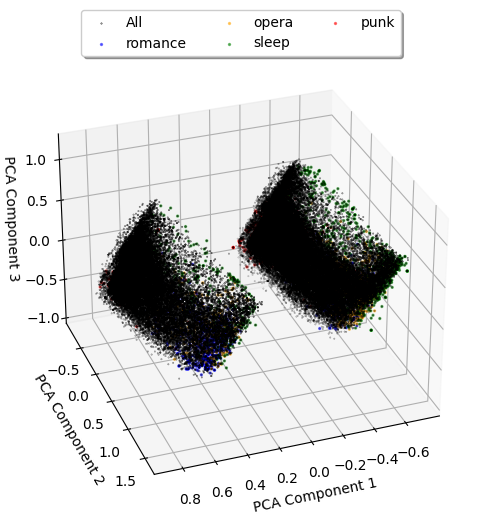

In [26]:

# Set up the figure and 3D axes
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plotting all points in black
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], color='black', s=0.1, label='All')

# Plotting the 'romance' genre in blue
idx = y[y == 'romance'].index
ax.scatter(x_pca[idx, 0], x_pca[idx, 1], x_pca[idx, 2], color='blue', alpha=0.5, s=2, label='romance')

# Plotting the 'opera' genre in orange
idx = y[y == 'opera'].index
ax.scatter(x_pca[idx, 0], x_pca[idx, 1], x_pca[idx, 2], color='orange', alpha=0.5, s=2, label='opera')

# Plotting the 'sleep' genre in green
idx = y[y == 'sleep'].index
ax.scatter(x_pca[idx, 0], x_pca[idx, 1], x_pca[idx, 2], color='green', alpha=0.5, s=2, label='sleep')

# Plotting the 'punk' genre in red
idx = y[y == 'punk'].index
ax.scatter(x_pca[idx, 0], x_pca[idx, 1], x_pca[idx, 2], color='red', alpha=0.5, s=2, label='punk')

# Setting labels
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Setting up the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)
ax.view_init(elev=30, azim=70)  # Adjust these values to rotate the plot

# Showing the plot
plt.show()

Although we can infer some insights about the mentioned attributes, grouping them into principal components leads to a loss of intuition, making it harder to interpret the clusters. Therefore, we chose to use all 15 attributes as input for the model and not to use PCA for the clustering problem.

## K-means
To determine the appropriate number of clusters , we examined the Silhouette coefficient, defined as S = \frac{b-a}{\max(a,b)}, where \( a \) is the average intra-cluster distance and \( b \) is the average inter-cluster distance. We initialized the cluster center positions using the "k-means++" method, which aims to maximize the probability that a candidate centroid point is far from the first already chosen cluster.

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances_argmin_min

Let's test the code for 5 clusters first.

In [36]:
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++')
cluster_labels = clusterer.fit_predict(x_sub)

cluster_idx = []
for i in range(n_clusters):
  cluster_idx.append(y_sub[cluster_labels==i].index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
atri_m = []
atri_s = []

for col in x_sub.columns:

  atri_mean = []
  atri_std = []

  for i in range(n_clusters):
    atri_mean.append(np.mean(x_s.iloc[cluster_idx[i]][col]))
    atri_std.append(np.std(x_s.iloc[cluster_idx[i]][col]))
  atri_m.append(atri_mean)
  atri_s.append(atri_std)

atri_m = np.array(atri_m)
atri_s = np.array(atri_s)

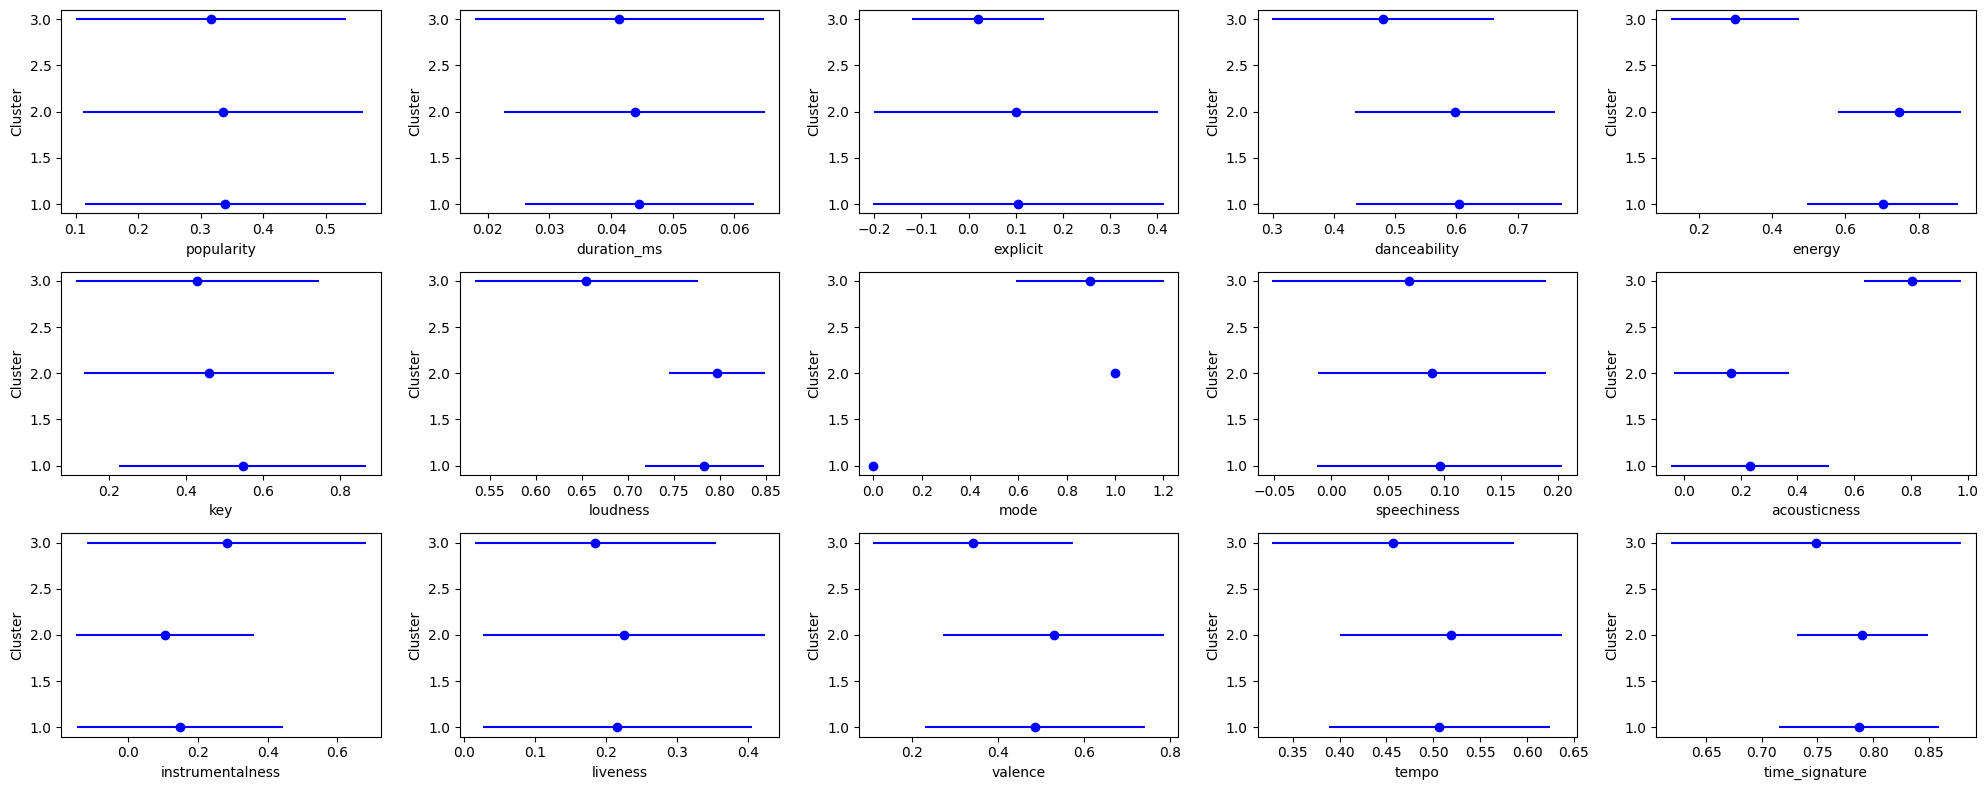

In [38]:
cluster_name = np.arange(n_clusters) + 1
num_columns = x_sub.columns.size

fig, axes = plt.subplots(3, 5, figsize=(20, 8))

# Flattening the axes array to easily iterate over it
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.errorbar(x=atri_m[i, :], y=cluster_name, xerr=atri_s[i, :], fmt="o", color='blue')
    ax.set_xlabel(x_sub.columns[i])
    ax.set_ylabel('Cluster')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
cluster_ = []
for i in range(n_clusters):
  cluster_.append(y_sub[cluster_idx[i]].value_counts())

<Figure size 1600x800 with 0 Axes>

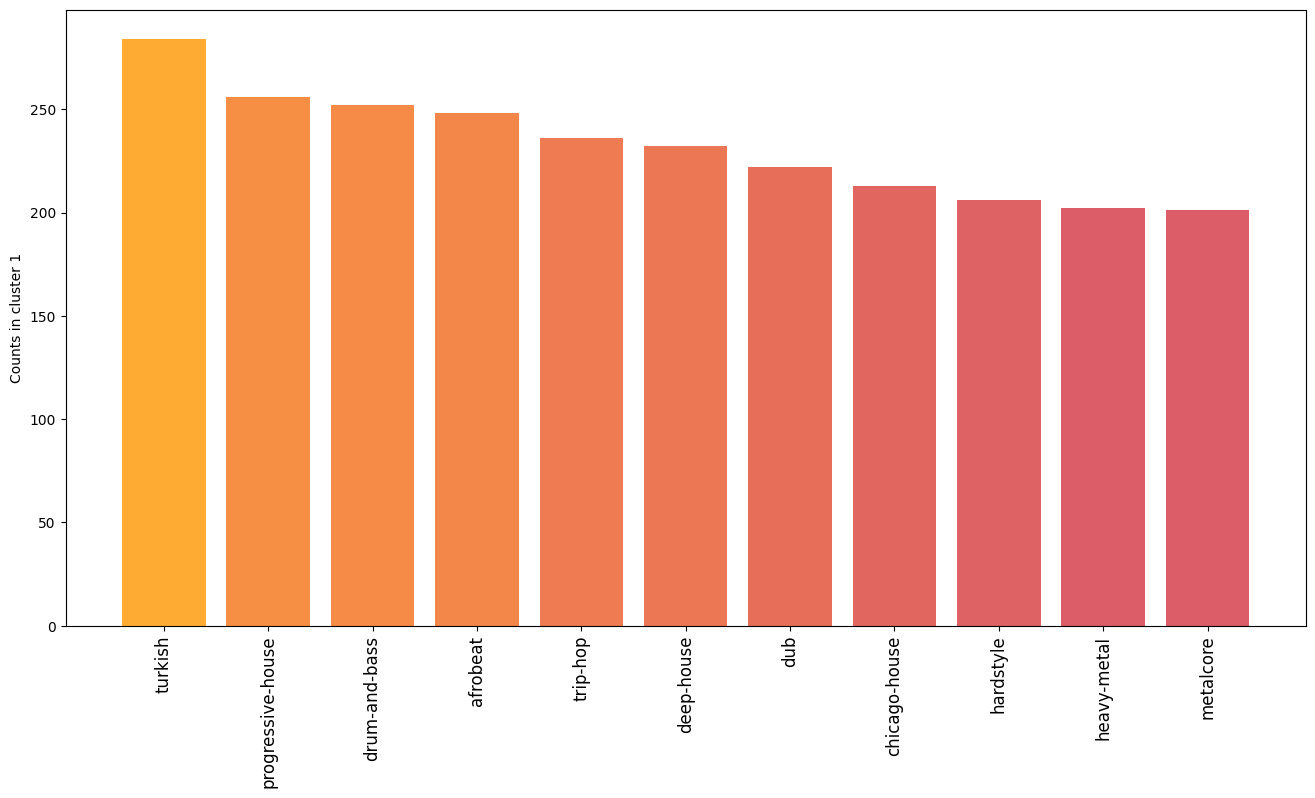

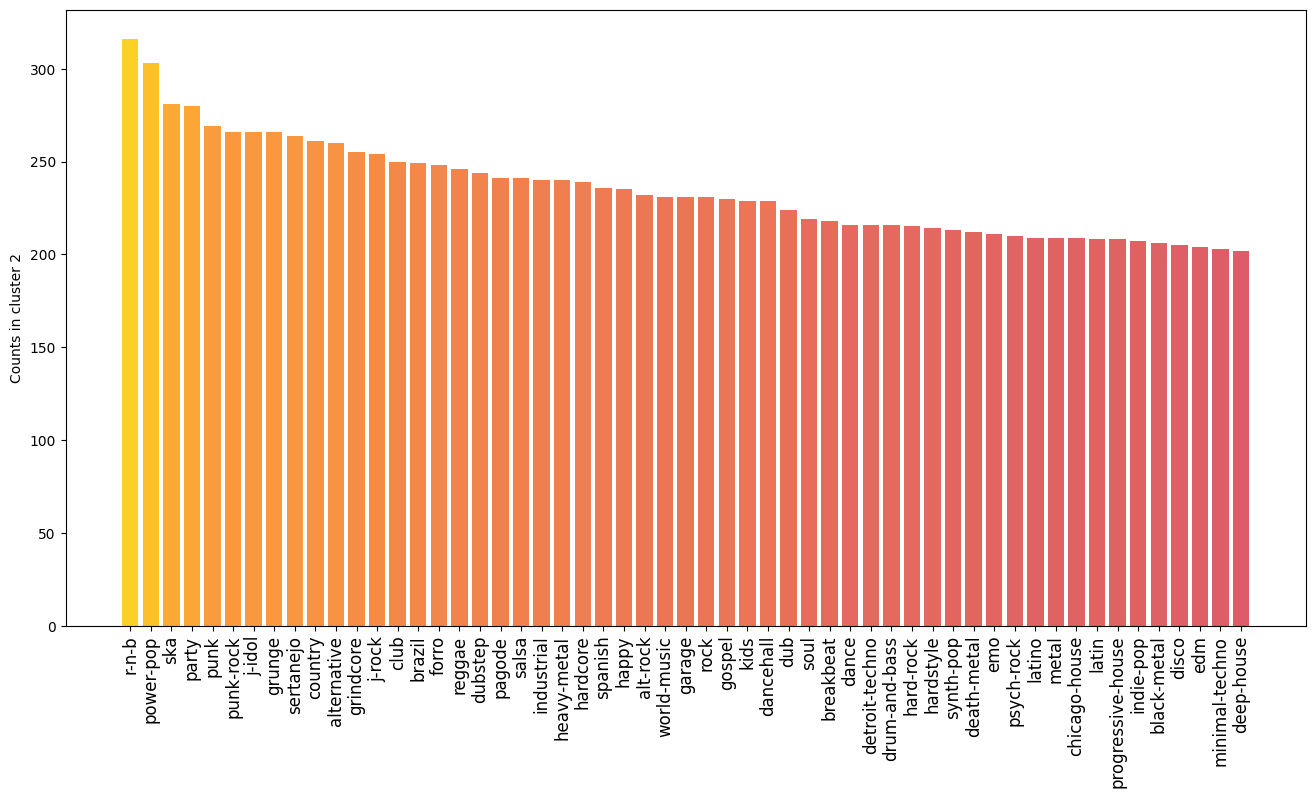

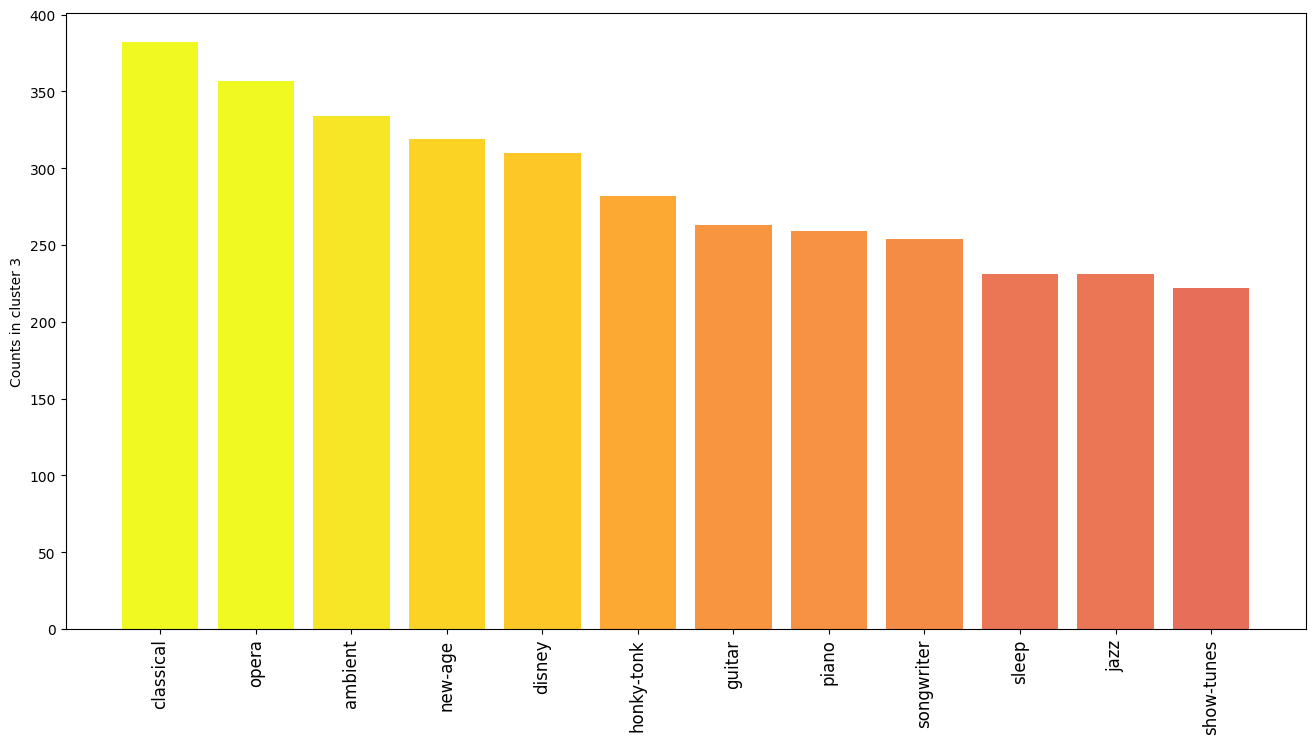

In [40]:
inf_limit = 200
plt.figure(figsize=(16,8))
for i in range(n_clusters):
  plt.figure(figsize=(16,8))
  C = cluster_[i][cluster_[i]>inf_limit]
  plt.ylabel('Counts in cluster '+str(i+1))
  colors = cm.plasma(C / float(350))
  plt.bar(C.index,C,color=colors);
  plt.xticks(rotation=90,size=12);
  plt.show()

In [41]:
silhouette_avg = silhouette_score(x_sub, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

For n_clusters = 3 The average silhouette_score is : 0.23650923526838788


This value is closer to 0 than 1, which might indicate a bad clustering.

In [42]:
sample_silhouette_values = silhouette_samples(x_sub, cluster_labels)

Now let's calculate Silluete plot for different numbers of clusters.

In [51]:
def plot_Silluete(n_clusters,x_sub):
  clusterer = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++')
  cluster_labels = clusterer.fit_predict(x_sub)
  silhouette_avg = silhouette_score(x_sub, cluster_labels)
  sample_silhouette_values = silhouette_samples(x_sub, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      plt.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          facecolor=color,
          edgecolor=color,
          alpha=0.7,
      )

      # Label the silhouette plots with their cluster numbers at the middle
      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  #plt.title("The silhouette plot for the"+str(n_clusters)+" clusters.")
  plt.xlabel("S")
  plt.ylabel("Rótulos de Clusters")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


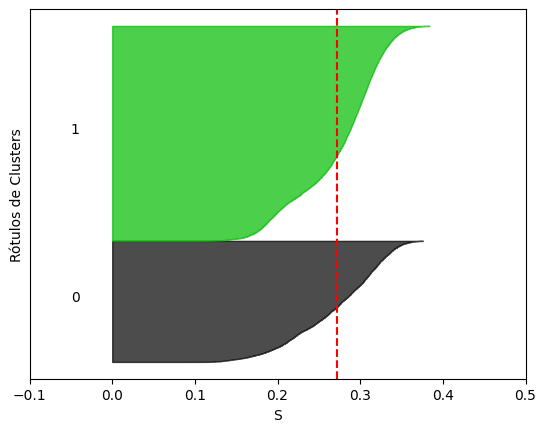

In [44]:
plot_Silluete(2,x_sub)

2 clusters doesn't seem great as most o the points are located inside a single cluster.

### Checking the optimal number of clusters: Elbow method

In [45]:
sil_list = []
n_clusters_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]
for n_clusters in n_clusters_list:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++')
  cluster_labels = clusterer.fit_predict(x_sub)
  silhouette_avg = silhouette_score(x_sub, cluster_labels)
  sil_list.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

This indicates a better separation between the samples for *n_clusters=2*. However, when analyzing the distribution of attributes for 2 clusters, it was observed that the model relied solely on the *mode* attribute. To avoid triviality in the model's decision, we preferred to choose an *n_clusters* that still reasonably separates the data. We noticed that *n_clusters=6* seems to favor this balance, so we selected this value for our analyses.

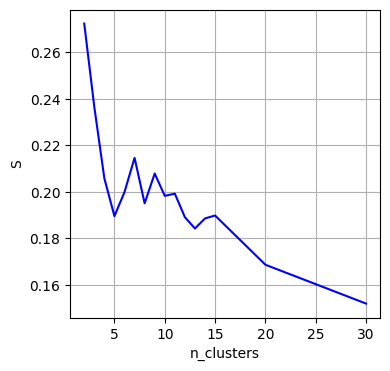

In [46]:
plt.figure(figsize=(4,4))
plt.xlabel('n_clusters')
plt.ylabel('S')
plt.plot(n_clusters_list,sil_list,color='blue')
plt.grid(True)
plt.show()

Lets compare 3 and 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


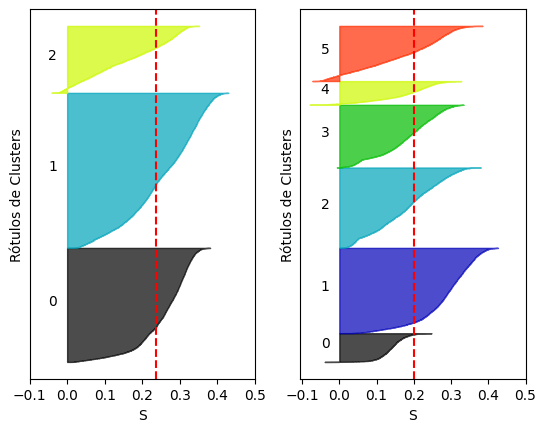

In [52]:
plt.subplot(121)
plot_Silluete(3,x_sub)
plt.subplot(122)
plot_Silluete(6,x_sub)

We see that both options give very simillar avg. S. It's difficult to say which number of cluster to choose without looking to the feature. Having more clusters avoids triviality but also it seems to present more outliers.

Let's see the features for 6 clusters.

In [53]:
n_clusters=6
clusterer = KMeans(n_clusters=n_clusters, random_state=42,init='k-means++')
cluster_labels = clusterer.fit_predict(x_sub)

cluster_idx = []
for i in range(n_clusters):
  cluster_idx.append(y_sub[cluster_labels==i].index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
atri_m = []
atri_s = []

for col in x_sub.columns:

  atri_mean = []
  atri_std = []

  for i in range(n_clusters):
    atri_mean.append(np.mean(x_s.iloc[cluster_idx[i]][col]))
    atri_std.append(np.std(x_s.iloc[cluster_idx[i]][col]))
  atri_m.append(atri_mean)
  atri_s.append(atri_std)

atri_m = np.array(atri_m)
atri_s = np.array(atri_s)

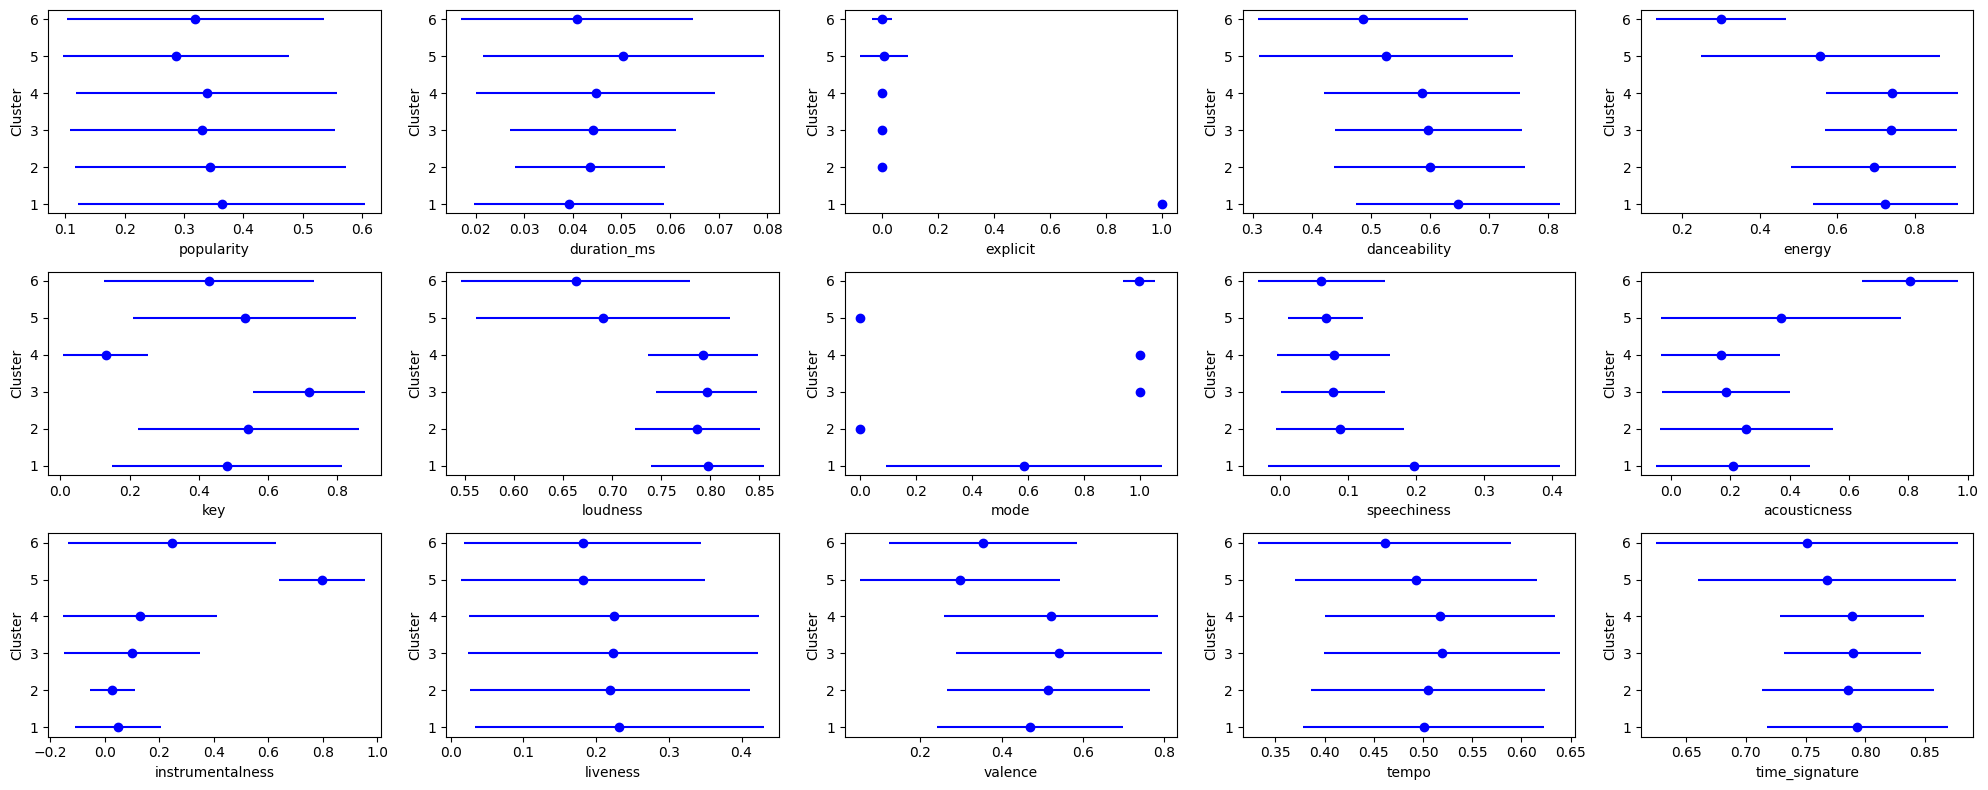

In [57]:
cluster_name = np.arange(n_clusters) + 1
num_columns = x_sub.columns.size

fig, axes = plt.subplots(3, 5, figsize=(20, 8))

# Flattening the axes array to easily iterate over it
axes = axes.flatten()

for i in range(num_columns):
    ax = axes[i]
    ax.errorbar(x=atri_m[i, :], y=cluster_name, xerr=atri_s[i, :], fmt="o", color='blue')
    ax.set_xlabel(x_sub.columns[i])
    ax.set_ylabel('Cluster')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

We can see a few characteristics:


1.   Cluster 1: Explicit songs
2.   Cluster 2: Mode 0
3.   Cluster 3: Mode 1
4.   Cluster 4: Low key
5.   Cluster 5: Instrumental
6.   Cluster 6: Acoustic



We can check the top genre of each cluster to see if it matches:

In [68]:
cluster_ = []
for i in range(n_clusters):
  cluster_.append(y_sub[cluster_idx[i]].value_counts())

In [71]:
# Assuming inf_limit, cluster_, and n_clusters are defined
top_n = 4

for i in range(n_clusters):
    C = cluster_[i]

    # Sort the genres by count in descending order and select the top 4
    top_genres = C.sort_values(ascending=False).head(top_n)
    print(f"Cluster {i+1}: {', '.join(top_genres.index)}")
    print(f"Counts: {', '.join(map(str, top_genres.values))}")

Cluster 1: comedy, sad, emo, j-dance
Counts: 264, 176, 164, 131
Cluster 2: turkish, romance, dub, progressive-house
Counts: 228, 209, 184, 174
Cluster 3: r-n-b, country, party, j-idol
Counts: 201, 171, 170, 163
Cluster 4: punk-rock, ska, power-pop, salsa
Counts: 140, 129, 128, 124
Cluster 5: study, minimal-techno, detroit-techno, idm
Counts: 169, 144, 134, 125
Cluster 6: opera, classical, honky-tonk, disney
Counts: 309, 302, 263, 258


The features seems to describe well the clusters! But since we got such a low value of S, we might need to treat the problem as Fyzzy kmeans in the future.